In [2]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import h2o
from h2o.automl import H2OAutoML
from h2o.estimators.gbm import H2OGradientBoostingEstimator
%matplotlib inline

In [3]:
#### 2. 데이터 불러오기 ####
data_df = pd.read_csv("../data/data/합천_댐기상종합_forTrain.csv", index_col=0)

In [ ]:
from trainlib import lagndelay, scale, split


df2 = data_df.copy()
num_lags = 10 # number of lags and window lenghts for mean aggregation
delay = 3 # predict target five steps ahead
y = '당일유입량'
df_processed = lagndelay(num_lags, delay, df2, y)

scaler = MinMaxScaler()
df_scaled = scale(scaler, df_processed)


In [5]:
df_train, df_test = split(0.8, df_scaled)

In [ ]:
h2o.init(ip="localhost", port=54323, nthreads=-1)
h2o.no_progress()

In [7]:
hf_train = h2o.H2OFrame(df_train)
hf_test = h2o.H2OFrame(df_test)
X = hf_train.columns
X.remove(y)

In [9]:
aml = H2OAutoML(max_runtime_secs = 600,
                seed = 42)
aml.train(x = X, 
          y = y,
          training_frame = hf_train,
          leaderboard_frame = hf_test)


15:12:57.591: _train param, Dropping bad and constant columns: [sin_day_of_week_avg_window_length7]


15:13:38.608: _train param, Dropping bad and constant columns: [sin_day_of_week_avg_window_length7]


15:13:42.810: _train param, Dropping bad and constant columns: [sin_day_of_week_avg_window_length7]


15:13:56.194: _train param, Dropping unused columns: [sin_day_of_week_avg_window_length7]
15:13:56.848: _train param, Dropping bad and constant columns: [sin_day_of_week_avg_window_length7]

Job request failed Unexpected HTTP error: ('Connection aborted.', BadStatusLine('GET /3/Jobs/$03017f00000134d4ffffffff$_9a2b17f7223bb81c4a7bcef7d41146df HTTP/1.1\r\n')), will retry after 3s.

15:14:22.891: _train param, Dropping bad and constant columns: [sin_day_of_week_avg_window_length7]


15:15:41.671: _train param, Dropping bad and constant columns: [sin_day_of_week_avg_window_length7]


15:15:47.563: _train param, Dropping bad and constant columns: [sin_day_of_week_avg_window_length7]


15:1

Model Details
=============
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: GBM_grid_1_AutoML_1_20230527_151257_model_6


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    44                 44                          13404                  9            9            9             10            38            19.3864

ModelMetricsRegression: gbm
** Reported on train data. **

MSE: 0.0006598752140090512
RMSE: 0.02568803639846867
MAE: 0.007991950832734277
RMSLE: 0.021803877651600724
Mean Residual Deviance: 0.0006598752140090512

ModelMetricsRegression: gbm
** Reported on cross-validation data. **

MSE: 0.0007884969084116523
RMSE: 0.028080187114968666
MAE: 0.008804058168152584
RMSLE: 0.0240954092122423
Mean Residual Deviance: 0.0007884969084116523

Cross-Validation Metrics Summary: 
                        mean         sd           cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid
----------------------  -----------  -----------  ------------  ------------  ------------  ------------  ------------
mae                     0.00881255   0.000455615  0.00890058    0.00956149    0.0086691     0.00844826    0.00848331
mean_residual_deviance  0.000788738  0.000193905  0.000688551   0.00110227    0.00073682    0.000822759   0.000593284
mse                     0.000788738  0.000193905  0.000688551   0.00110227    0.00073682    0.000822759   0.000593284
r2                      0.282614     0.0408342    0.28277       0.263205      0.325202      0.225083      0.316812
residual_deviance       0.000788738  0.000193905  0.000688551   0.00110227    0.00073682    0.000822759   0.000593284
rmse                    0.0279253    0.00333849   0.0262403     0.0332005     0.0271444     0.0286838     0.0243574
rmsle                   0.0240069    0.00240207   0.0232224     0.028031      0.0231764     0.0239599     0.0216448

Scoring History: 
    timestamp            duration    number_of_trees    training_rmse    training_mae    training_deviance
--  -------------------  ----------  -----------------  ---------------  --------------  -------------------
    2023-05-27 15:21:06  53.142 sec  0                  0.0331049        0.012182        0.00109593
    2023-05-27 15:21:06  53.298 sec  5                  0.0299887        0.0100646       0.000899322
    2023-05-27 15:21:06  53.439 sec  10                 0.0284024        0.00910084      0.000806695
    2023-05-27 15:21:07  53.573 sec  15                 0.0276025        0.00865575      0.000761898
    2023-05-27 15:21:07  53.706 sec  20                 0.0270352        0.0083778       0.000730904
    2023-05-27 15:21:07  53.829 sec  25                 0.0267007        0.00822859      0.000712926
    2023-05-27 15:21:07  53.963 sec  30                 0.026373         0.00813081      0.000695538
    2023-05-27 15:21:07  54.095 sec  35                 0.0261507        0.00807105      0.000683861
    2023-05-27 15:21:07  54.221 sec  40                 0.0258766        0.00802702      0.000669596
    2023-05-27 15:21:07  54.320 sec  44                 0.025688         0.00799195      0.000659875

Variable Importances: 
variable                              relative_importance    scaled_importance    percentage
------------------------------------  ---------------------  -------------------  --------------------
당일유입량_lag1                       3.958726644515991      1.0                  0.27010362542190625
당일유입량_avg_window_length3         1.2904325723648071     0.32597162881969594  0.08804611872888381
저수량(현재)_lag8                     1.1437543630599976     0.2889197627839336   0.0780382753839776
당일유입량_avg_window_length2         0.7078508138656616     0.17880770192765005  0.04829660854401785
저수량(현

In [10]:
lb = aml.leaderboard
lb

model_id,rmse,mse,mae,rmsle,mean_residual_deviance
GBM_grid_1_AutoML_1_20230527_151257_model_6,0.0346087,0.00119776,0.0100285,0.0278173,0.00119776
GBM_grid_1_AutoML_1_20230527_151257_model_7,0.0346644,0.00120162,0.0101537,0.0278685,0.00120162
GBM_1_AutoML_1_20230527_151257,0.0348331,0.00121335,0.0100662,0.028052,0.00121335
GBM_grid_1_AutoML_1_20230527_151257_model_5,0.0356156,0.00126847,0.0100275,0.0290183,0.00126847
StackedEnsemble_BestOfFamily_2_AutoML_1_20230527_151257,0.0358779,0.00128723,0.0109098,0.0293885,0.00128723
StackedEnsemble_AllModels_3_AutoML_1_20230527_151257,0.0359461,0.00129212,0.0109598,0.0293911,0.00129212
StackedEnsemble_AllModels_4_AutoML_1_20230527_151257,0.0359461,0.00129212,0.0109598,0.0293911,0.00129212
StackedEnsemble_BestOfFamily_4_AutoML_1_20230527_151257,0.0361167,0.00130442,0.0111081,0.0296194,0.00130442
StackedEnsemble_BestOfFamily_5_AutoML_1_20230527_151257,0.0361331,0.0013056,0.0114619,0.0296732,0.0013056
XGBoost_grid_1_AutoML_1_20230527_151257_model_1,0.0362148,0.00131151,0.0126313,0.0305036,0.00131151


In [11]:
leader_model = aml.leader
hf_test_predict = leader_model.predict(hf_test)
df_results = pd.DataFrame()
df_results['ground_truth'] = df_test[y].reset_index(drop=True)
df_results['predictions'] = h2o.as_list(hf_test_predict,use_pandas=True)
df_results.head()

,ground_truth,predictions
0,0.001897,0.003716
1,0.000896,0.003699
2,0.001634,0.004760
3,0.000896,0.004000
4,0.000158,0.004959


R2 =  0.2611920663431516


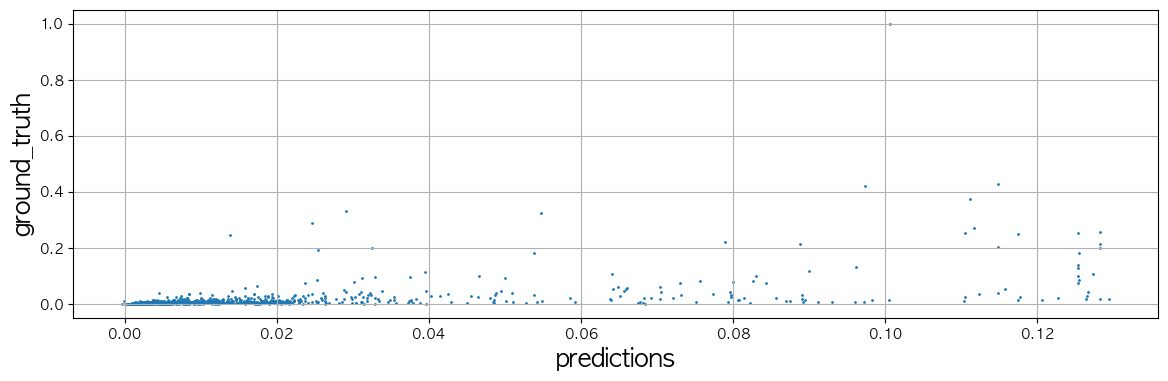

In [17]:
from matplotlib import pyplot as plt
from scipy import stats
plt.rc('font', family='AppleGothic') 			## 이 두 줄을 
plt.rcParams['axes.unicode_minus'] = False  ## 추가해줍니다. 
plt.rcParams["figure.figsize"] = (14,4)
plt.rcParams['axes.grid'] = True


slope, intercept, r_value, p_value, std_err = stats.linregress(x=df_results['predictions'],y=df_results['ground_truth'])
print('R2 = ',r_value*r_value)
plt.scatter(x=df_results['predictions'],y=df_results['ground_truth'],s=1)
plt.xlabel('predictions',fontsize=18)
plt.ylabel('ground_truth',fontsize=18)
plt.show()


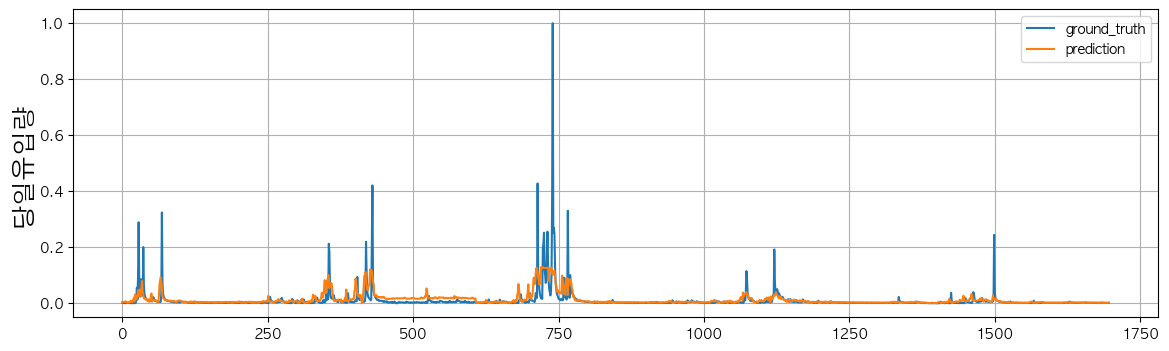

In [18]:
plt.plot(df_results['ground_truth'])
plt.plot(df_results['predictions'])
plt.ylabel(y,fontsize=18)
plt.legend(['ground_truth','prediction'])
plt.show()